### __Project 1: Pricing Optimization Project__

__Scenario:__

Imagine you're tasked with optimizing the pricing strategy for a telecommunications service. You have historical data on pricing, sales volumes, and costs.

__Tasks:__

*   Load the data containing information about current price, sales volume, and cost of goods sold, for a period of two years.
*   Calculate revenue and profit based on the current pricing strategy.
*   Visualize the current pricing strategy over time.
*   Print average monthly profit and peak monthly sales volume metrics.

In [4]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.dates import DateFormatter

In [5]:
# Load the pricing_data.csv
pricing_data = pd.read_csv("pricing_data.csv")

pricing_data.head()

,Month,Current_Price,Sales_Volume,Cost_of_Goods_Sold
0,2022-01-31,37.490802,1189,15.159663
1,2022-02-28,49.014286,1957,17.308938
2,2022-03-31,44.639879,1686,17.410255
3,2022-04-30,41.973170,1957,21.832635
4,2022-05-31,33.120373,1562,21.099967


In [6]:
# Calculate revenue and profit
pricing_data['Revenue'] = pricing_data['Current_Price'] * pricing_data['Sales_Volume']
pricing_data['Profit'] = pricing_data['Revenue'] - pricing_data['Cost_of_Goods_Sold']

pricing_data.head()

,Month,Current_Price,Sales_Volume,Cost_of_Goods_Sold,Revenue,Profit
0,2022-01-31,37.490802,1189,15.159663,44576.564026,44561.404364
1,2022-02-28,49.014286,1957,17.308938,95920.957953,95903.649015
2,2022-03-31,44.639879,1686,17.410255,75262.835718,75245.425463
3,2022-04-30,41.973170,1957,21.832635,82141.493071,82119.660436
4,2022-05-31,33.120373,1562,21.099967,51734.022327,51712.922361


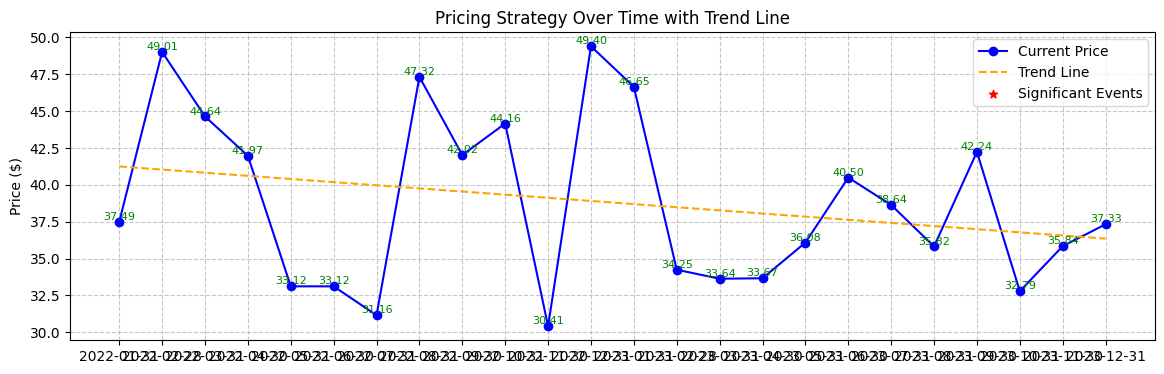

In [7]:

# Visualize current pricing strategy with trend line
plt.figure(figsize=(14, 4))

# Plotting the current price
plt.plot(pricing_data['Month'], pricing_data['Current_Price'], label='Current Price', marker='o', color='blue')

# Adding a trend line using linear regression
X = np.arange(len(pricing_data['Month'])).reshape(-1, 1)
y = pricing_data['Current_Price'].values.reshape(-1, 1)
regression = LinearRegression().fit(X, y)
plt.plot(pricing_data['Month'], regression.predict(X), label='Trend Line', linestyle='--', color='orange')

# Highlighting key points (e.g., price increases, decreases)
# You can replace these indices with the actual indices of significant events
significant_events = [2, 8, 12]
plt.scatter(pricing_data['Month'].iloc[significant_events], pricing_data['Current_Price'].iloc[significant_events],
            color='red', marker='*', label='Significant Events')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Adding labels and title
plt.title('Pricing Strategy Over Time with Trend Line')
plt.ylabel('Price ($)')

# Adding data labels in small font and grey color
for i, (month, price) in enumerate(zip(pricing_data['Month'], pricing_data['Current_Price'])):
    plt.text(month, price, f'{price:.2f}', fontsize=8, color='green', ha='center', va='bottom')

plt.legend()

# Show the plot
plt.show()


In [8]:
# Assess profit and sales volume metrics
average_profit = pricing_data['Profit'].mean()
peak_sales_volume = pricing_data['Sales_Volume'].max()

print(f"Average Monthly Profit: ${average_profit:.2f}")
print(f"Peak Monthly Sales Volume: {peak_sales_volume} units")


Average Monthly Profit: $58809.07
Peak Monthly Sales Volume: 1957 units
